##### 偵測滑鼠事件
這篇教學會介紹在 PyQt5 的視窗裡，偵測滑鼠的按下、放開、移動、捲動等事件，並根據滑鼠事件，進行簡單的互動應用。

##### 常用的滑鼠事件 
建立 PyQt5 的 Widget 元件之後，只要套用對應的偵測方法，就可以偵測滑鼠的事件 ( 按下、放開、移動...等 )，下方列出常用的滑鼠事件：

以下方的程式碼執行後，會開啟一個空白的視窗，在視窗裡按下滑鼠時，後台就會印出 press 的文字 ( 注意，對應事件的函式需要包含一個 self 參數 )。

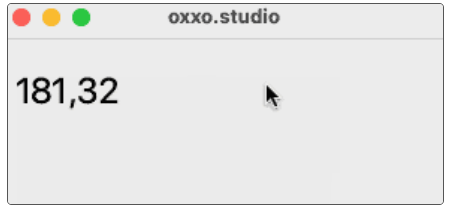

In [ ]:
from PyQt5 import QtWidgets
import sys

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

def mousePress(self):
    print('press')

Form.mousePressEvent  = mousePress

label = QtWidgets.QLabel(Form)
label.setGeometry(10,10,100,50)
label.setStyleSheet('font-size:24px;')

def mouseMove(self):
    label.setText(f'{self.x()}, {self.y()}')   # 透過 QLabel 顯示滑鼠座標

Form.setMouseTracking(True)        # 設定不需要按下滑鼠，就能偵測滑鼠移動
Form.mouseMoveEvent  = mouseMove   # 滑鼠移動事件發生時，執行 mouseMove 函式

Form.show()
sys.exit(app.exec_())

##### 偵測事件後可以取得的數值 
取的滑鼠事件後，就能透過下列的方法，取得常用的幾個滑鼠數值。

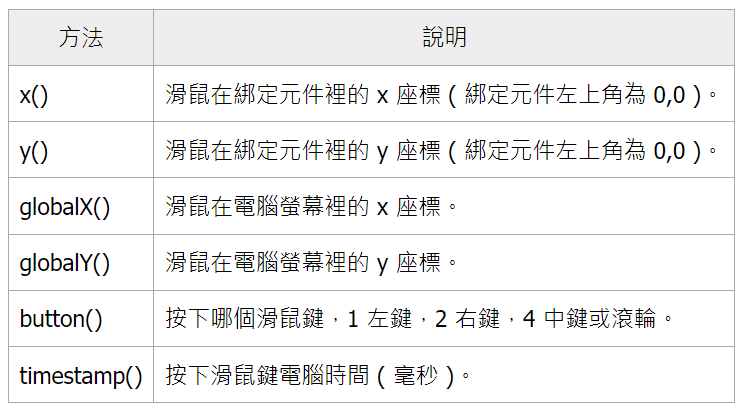

下方的例子執行後，會使用 QLabel 顯示按下哪個滑鼠按鍵。

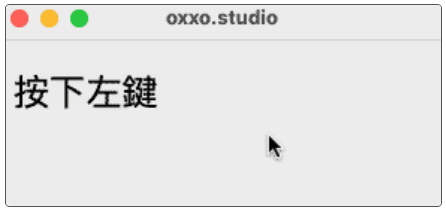

In [ ]:
from PyQt5 import QtWidgets
import sys

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)
label.setGeometry(10,10,100,50)
label.setStyleSheet('font-size:24px;')

def mousePress(self):
    print(self.button())
    if self.button() == 1:
        label.setText('按下左鍵')
    elif self.button() == 2:
        label.setText('按下右鍵')
    else:
        label.setText('')

Form.mousePressEvent  = mousePress    # 新增按下滑鼠事件，事件發生時執行 mousePress 函式

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示，比較需要注意的是要使用 event。

In [ ]:
# 从 PyQt5 包中导入 QtWidgets 模块，包含用于构建图形用户界面的类。
from PyQt5 import QtWidgets
import sys  # 导入 sys 模块，用于处理与 Python 解释器相关的操作，如命令行参数和程序退出。

# 定义一个名为 MyWidget 的类，继承自 QtWidgets.QWidget，这是 PyQt5 中所有窗口类型组件的基类。
class MyWidget(QtWidgets.QWidget):
    # 类的初始化方法。
    def __init__(self):
        super().__init__()  # 调用父类的构造函数，进行基本的窗口设置。
        self.setWindowTitle('oxxo.studio')  # 设置窗口的标题。
        self.resize(300, 200)  # 设置窗口的大小。
        self.ui()  # 调用自定义的 ui 方法来创建用户界面。

    # 定义一个名为 ui 的方法，用于设置窗口中的组件。
    def ui(self):
        self.label = QtWidgets.QLabel(self)  # 创建一个 QLabel 对象作为文本显示。
        self.label.setGeometry(10, 10, 100, 50)  # 设置标签的位置和大小。
        self.label.setStyleSheet('font-size:24px;')  # 设置标签的样式，这里是字体大小。

    # 重写 QWidget 的 mousePressEvent 方法以处理鼠标按下事件。
    def mousePressEvent(self, event):
        print(event.button())  # 打印被按下的鼠标按钮编号。
        if event.button() == 1:  # 如果按下的是左键（通常编号为1）。
            self.label.setText('按下左鍵')  # 更新标签文本。
        elif event.button() == 2:  # 如果按下的是右键（通常编号为2）。
            self.label.setText('按下右鍵')  # 更新标签文本。
        else:
            self.label.setText('')  # 对于其他按钮，清除标签文本。

# 程序的入口点。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 创建一个应用程序实例。
    Form = MyWidget()  # 创建 MyWidget 类的实例。
    Form.show()  # 显示窗口。
    sys.exit(app.exec_())  # 启动应用程序的事件循环，等待用户操作。